필요한 라이브러리 모듈 가져오기

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

Instructions for updating:
Use the retry module or similar alternatives.


난수 생성

In [2]:
np.random.seed(20180427)

mnist 데이터 다운로드

In [3]:
mnist = input_data.read_data_sets("C:/tf_workspace/3.Classification/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:/tf_workspace/3.Classification/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting C:/tf_workspace/3.Classification/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting C:/tf_workspace/3.Classification/data/t10k-images-idx3-ubyte.gz
Extracting C:/tf_workspace/3.Classification/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


**1단계 수식작성**
> * x : mnist 데이터 
> * tf.nn.softmax() : 입력받은 값을 0~1 사이의 값으로 모두 정규화 하역 출력하며 총합은 1이 됨
> * softmax 관련 자료 링크 : https://tensorflow.blog/%ED%95%B4%EC%BB%A4%EC%97%90%EA%B2%8C-%EC%A0%84%ED%95%B4%EB%93%A4%EC%9D%80-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-3/

In [4]:
x = tf.placeholder(tf.float32, [None, 784])
w = tf.Variable(tf.zeros([784, 10]))
w0 = tf.Variable(tf.zeros([10]))

f = tf.matmul(x, w) + w0
p = tf.nn.softmax(f)

**2단계 오차함수 작성**

In [5]:
t = tf.placeholder(tf.float32, [None, 10])
costFunction = -tf.reduce_sum(t * tf.log(p))

**3단계 최적화 과정을 통해 파리미터 값을 결정**

In [6]:
trainOptimizer = tf.train.AdamOptimizer()
train = trainOptimizer.minimize(costFunction)

예측값과 정확도 구하는 식 선언

In [7]:
prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(prediction, tf.float32))

세션 정의 및 변수 초기화

In [8]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

2,000번 학습 과정을 통하여 손실값과 정확도 출력
> next_batch : 데이터를 어디까지 추출했는지 기억해두고 호출할때 마다 다음데이터를 추출함 (확률적 경사 하강법 사용)
>> * 경사 하강법과 확률적 경사 하강법 
>> <pre><code> 확률적 경사하강법(stochastic gradient descent)과 경사하강법(gradient descent) 두 알고리즘은 데이터에 대한 매개변수를 평가를 하고 값을 조정하면서 손실함수(Loss Function)을 최소화하는 값을 구하는 접근 방법입니다. 특히 함수가 어렵고 복잡하여 수학적 접근 방법으로 풀기 어려운 문제에도 잘 동작을 합니다.
 경사 하강법은 모든 훈련 데이터에서 대해서 값을 평가하고 매개변수 업데이트를 진행하기 때문에 속도가 느립니다. 하지만 확률적 경사하강법은 확률적으로 선택한 데이터에 대해서 값을 평가하고 매개변수를 업데이트를 하기 때문에 경사 하강법에 비해서 빠른 속도를 보장합니다.
 예를 들어 설명해 보겠습니다. 직원이 10만명 되는 회사가 있다고 가정합니다. 이 회사에 작업복을 도입할 예정입니다. 직원들의 신체 치수를 정확히 모르기 때문에 작업복을 제작하기 위해서 직원들의 치수를 전체 다 측정하여 제작에 필요한 최적의 치수와 치수별 수량을 계산한다면 경사하강법 방식이고, 확률적으로 높은 분포의 임의의 사람 또는 그룹들을 선정하여 치수를 재고 그에 따른 최적의 치수와 치수별 수량을 계산하여 생산하는 방식이 확률적 경사하강법입니다. 전자는 시간이 많이 걸릴 것이고, 후자는 그에 비해서 빠르게 진행할 수 있을 것입니다.
경사하강법은 이론적으로 확률적 경사하강법보다 오류 기능을 최소화합니다. 그러나 확률적 경사하강법는 데이터 집합이 커지면 훨씬 빠르게 값에 수렴합니다. 즉 작은 데이터 세트의 경우 경사 하강법이 바람직하지만 큰 데이터 세트의 경우 확률적 경사하강법이 더 좋습니다. 그러나 실제로 확률적 경사하강법은 대부분의 응용 프로그램에 사용됩니다. 왜냐하면 확률적 경사하강법은 오류 기능을 충분히 최소화하면서 대용량 데이터 세트에 더 빠르고 효율적으로 사용할 수 있기 때문입니다.</code></pre>

In [12]:
itrNum = 0
for _ in range(2000):
    itrNum += 1
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train, feed_dict={x: batch_xs, t: batch_ts})
    if (itrNum % 100 == 0):
        costFunctionValue, accuracyValue = sess.run([costFunction, accuracy],feed_dict={x:mnist.test.images, t: mnist.test.labels})
        print ('Step: %d, cost(loss): %f, accuracy: %f' % (itrNum, costFunctionValue, accuracyValue))

Step: 100, cost(loss): 2840.955566, accuracy: 0.921600
Step: 200, cost(loss): 2834.437012, accuracy: 0.922900
Step: 300, cost(loss): 2812.312500, accuracy: 0.921400
Step: 400, cost(loss): 2805.594727, accuracy: 0.921200
Step: 500, cost(loss): 2794.102539, accuracy: 0.921500
Step: 600, cost(loss): 2773.707031, accuracy: 0.923500
Step: 700, cost(loss): 2744.569824, accuracy: 0.925400
Step: 800, cost(loss): 2779.005371, accuracy: 0.922900
Step: 900, cost(loss): 2729.436279, accuracy: 0.923900
Step: 1000, cost(loss): 2740.960205, accuracy: 0.924800
Step: 1100, cost(loss): 2740.185059, accuracy: 0.924200
Step: 1200, cost(loss): 2743.084717, accuracy: 0.922800
Step: 1300, cost(loss): 2715.869141, accuracy: 0.923600
Step: 1400, cost(loss): 2712.010254, accuracy: 0.924100
Step: 1500, cost(loss): 2701.474121, accuracy: 0.924800
Step: 1600, cost(loss): 2691.330322, accuracy: 0.924800
Step: 1700, cost(loss): 2711.032715, accuracy: 0.924600
Step: 1800, cost(loss): 2701.166504, accuracy: 0.924600
S

학습 결과 출력
> 라벨 0 / 4 는 앞자리는 예측값 / 실제값 을 나타냄

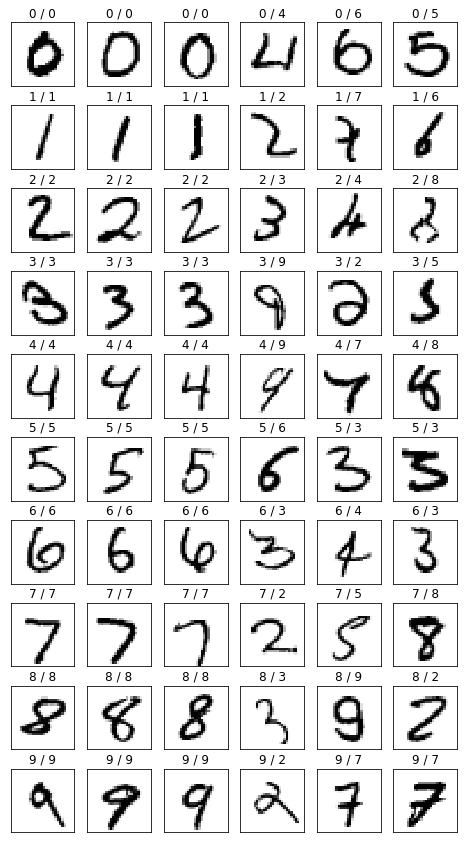

In [10]:
images, labels = mnist.test.images, mnist.test.labels
pValue = sess.run(p, feed_dict={x:images, t: labels}) 

fig = plt.figure(figsize=(8,15))
for i in range(10):
    c = 1
    for (image, label, pred) in zip(images, labels, pValue):
        prediction, actual = np.argmax(pred), np.argmax(label)
        if prediction != i:
            continue
        if (c < 4 and i == actual) or (c >= 4 and i != actual):
            subplot = fig.add_subplot(10,6,i*6+c)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.set_title('%d / %d' % (prediction, actual))
            subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1, cmap=plt.cm.gray_r, interpolation="nearest")
            c += 1
            if c > 6:
                break